In [5]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
import sqlite3
from scipy.stats import ttest_ind
import scipy.stats as stats
warnings.filterwarnings('ignore')

In [1]:
#function that will change numbers into short form for better readability.
def format_dollars(value):
    if value > 1000000:
        return f"{value/1000000 : .2f}M "
    if value >= 1000:
        return f"{value/1000 : .2f}K"
    else:
        return str(value)
    
format_dollars(200000000)

' 200.00M '

**loading the dataset**

In [8]:
#creating database connection

conn = sqlite3.connect('inventory_db')

#fetching vendor summary data

df = pd.read_sql_query('select * from Vendor_Final_summary', conn)
print(df.shape)
df.head()

(10692, 17)


,VendorNumber,VendorName,Brand,Description,PurchasePrice,ActualPrice,volume,TotalPurchaseQuantity,TotalPurchaseDollars,TotalSalesQuantity,TotalSalesPrice,TotalSalesDollars,TotalExciseTax,FreightCost,GrossProfit,ProfitMargin,StockTurnover
0,1128,BROWN-FORMAN CORP,1233,Jack Daniels No 7 Black,26.27,36.99,1750.0,145080,3811251.60,142049.0,672819.31,5101919.51,260999.20,68601.68,1290667.91,25.297693,0.979108
1,4425,MARTIGNETTI COMPANIES,3405,Tito's Handmade Vodka,23.19,28.99,1750.0,164038,3804041.22,160247.0,561512.37,4819073.49,294438.66,144929.24,1015032.27,21.062810,0.976890
2,17035,PERNOD RICARD USA,8068,Absolut 80 Proof,18.24,24.99,1750.0,187407,3418303.68,187140.0,461140.15,4538120.60,343854.07,123780.22,1119816.92,24.675786,0.998575
3,3960,DIAGEO NORTH AMERICA INC,4261,Capt Morgan Spiced Rum,16.17,22.99,1750.0,201682,3261197.94,200412.0,420050.01,4475972.88,368242.80,257032.07,1214774.94,27.139908,0.993703
4,3960,DIAGEO NORTH AMERICA INC,3545,Ketel One Vodka,21.89,29.99,1750.0,138109,3023206.01,135838.0,545778.28,4223107.62,249587.83,257032.07,1199901.61,28.412764,0.983556


In [9]:
#summary statistics 
df.describe().T

,count,mean,std,min,25%,50%,75%,max
VendorNumber,10692.0,1.065065e+04,18753.519148,2.00,3951.000000,7153.000000,9552.000000,2.013590e+05
Brand,10692.0,1.803923e+04,12662.187074,58.00,5793.500000,18761.500000,25514.250000,9.063100e+04
PurchasePrice,10692.0,2.438530e+01,109.269375,0.36,6.840000,10.455000,19.482500,5.681810e+03
ActualPrice,10692.0,3.564367e+01,148.246016,0.49,10.990000,15.990000,28.990000,7.499990e+03
volume,10692.0,8.473605e+02,664.309212,50.00,750.000000,750.000000,750.000000,2.000000e+04
TotalPurchaseQuantity,10692.0,3.140887e+03,11095.086769,1.00,36.000000,262.000000,1975.750000,3.376600e+05
TotalPurchaseDollars,10692.0,3.010669e+04,123067.799627,0.71,453.457500,3655.465000,20738.245000,3.811252e+06
TotalSalesQuantity,10692.0,3.077482e+03,10952.851391,0.00,33.000000,261.000000,1929.250000,3.349390e+05
TotalSalesPrice,10692.0,1.879378e+04,44952.773386,0.00,289.710000,2857.800000,16059.562500,6.728193e+05
TotalSalesDollars,10692.0,4.223907e+04,167655.265984,0.00,729.220000,5298.045000,28396.915000,5.101920e+06


In [ ]:
#calculating current profit Margin

total_sales = df['TotalSalesDollars'].sum()
total_purchase = df['TotalPurchaseDollars'].sum() #considering that freightcost is included into purchasing cost

# If freight & tax are already in purchase, don’t subtract again:
# total_cost = total_purchase + df['FreightCost'].sum() + df['TotalExciseTax'].sum()

total_gross_profit = total_sales - total_purchase

# Now calculate margin
if total_sales != 0:
    total_profit_margin = (total_gross_profit / total_sales) * 100
else:
    total_profit_margin = 0

print(f"Total Gross Profit: ₹{total_gross_profit:,.2f}")
print(f"Overall Business Profit Margin: {total_profit_margin:.2f}%")



Total Gross Profit: ₹134,069,631.98
Overall Business Profit Margin: 30.37%


In [ ]:
#to remove infinite value from our analysis

df = pd.read_sql_query('''SELECT * FROM Vendor_Final_summary 
                  where GrossProfit >0 and ProfitMargin > 0 and TotalSalesQuantity >0  ''', conn)

In [14]:
print(df.shape)
df.head()

(8564, 17)


,VendorNumber,VendorName,Brand,Description,PurchasePrice,ActualPrice,volume,TotalPurchaseQuantity,TotalPurchaseDollars,TotalSalesQuantity,TotalSalesPrice,TotalSalesDollars,TotalExciseTax,FreightCost,GrossProfit,ProfitMargin,StockTurnover
0,1128,BROWN-FORMAN CORP,1233,Jack Daniels No 7 Black,26.27,36.99,1750.0,145080,3811251.60,142049.0,672819.31,5101919.51,260999.20,68601.68,1290667.91,25.297693,0.979108
1,4425,MARTIGNETTI COMPANIES,3405,Tito's Handmade Vodka,23.19,28.99,1750.0,164038,3804041.22,160247.0,561512.37,4819073.49,294438.66,144929.24,1015032.27,21.062810,0.976890
2,17035,PERNOD RICARD USA,8068,Absolut 80 Proof,18.24,24.99,1750.0,187407,3418303.68,187140.0,461140.15,4538120.60,343854.07,123780.22,1119816.92,24.675786,0.998575
3,3960,DIAGEO NORTH AMERICA INC,4261,Capt Morgan Spiced Rum,16.17,22.99,1750.0,201682,3261197.94,200412.0,420050.01,4475972.88,368242.80,257032.07,1214774.94,27.139908,0.993703
4,3960,DIAGEO NORTH AMERICA INC,3545,Ketel One Vodka,21.89,29.99,1750.0,138109,3023206.01,135838.0,545778.28,4223107.62,249587.83,257032.07,1199901.61,28.412764,0.983556


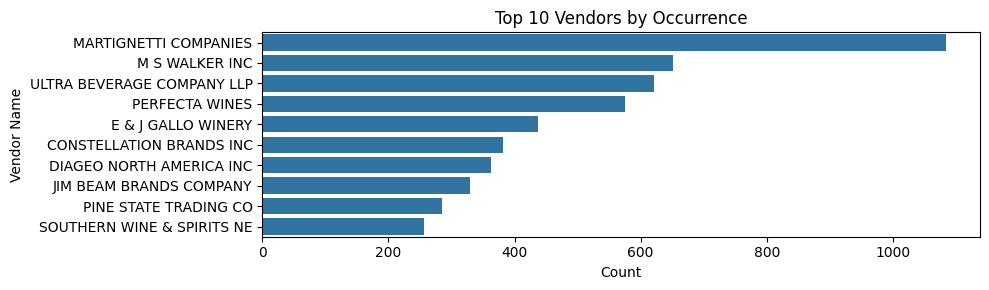

In [12]:
#count plot for Categorical Columns
top_vendors = df['VendorName'].value_counts().nlargest(10)

plt.figure(figsize=(10,3))
sns.barplot(x=top_vendors.values, y=top_vendors.index)

plt.title('Top 10 Vendors by Occurrence')
plt.xlabel('Count')
plt.ylabel('Vendor Name')
plt.tight_layout()
plt.show()

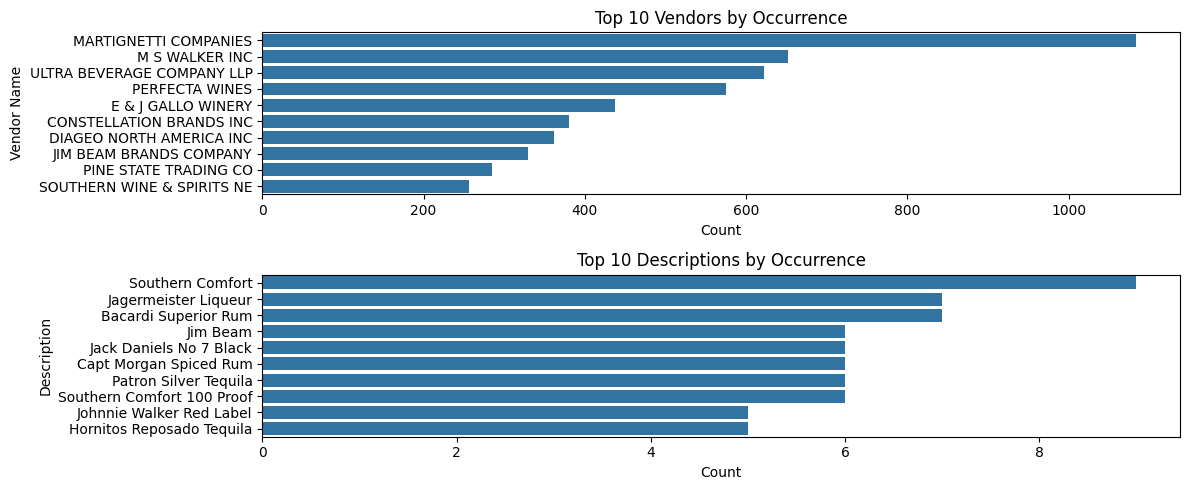

In [21]:
top_vendors = df['VendorName'].value_counts().nlargest(10)

# Top 10 Description
top_descriptions = df['Description'].value_counts().nlargest(10)

# Create subplots (1 row, 2 columns)
fig, axes = plt.subplots(2, 1, figsize=(12, 5))  # For vertical stack

# Plot 1: VendorName
sns.barplot(x=top_vendors.values, y=top_vendors.index, ax=axes[0])
axes[0].set_title('Top 10 Vendors by Occurrence')
axes[0].set_xlabel('Count')
axes[0].set_ylabel('Vendor Name')

# Plot 2: Description
sns.barplot(x=top_descriptions.values, y=top_descriptions.index, ax=axes[1])
axes[1].set_title('Top 10 Descriptions by Occurrence')
axes[1].set_xlabel('Count')
axes[1].set_ylabel('Description')

plt.tight_layout()
plt.show()

**problem statement 1 :** 


**Identify Brands that needs promotional or pricing adjustments which exhibit lower sales performance but higher profit margin ?**

In [15]:
df.head(1)

,VendorNumber,VendorName,Brand,Description,PurchasePrice,ActualPrice,volume,TotalPurchaseQuantity,TotalPurchaseDollars,TotalSalesQuantity,TotalSalesPrice,TotalSalesDollars,TotalExciseTax,FreightCost,GrossProfit,ProfitMargin,StockTurnover
0,1128,BROWN-FORMAN CORP,1233,Jack Daniels No 7 Black,26.27,36.99,1750.0,145080,3811251.6,142049.0,672819.31,5101919.51,260999.2,68601.68,1290667.91,25.297693,0.979108


In [16]:
# ProfitMargin higher
# TotalSalesDollars lower

brand_performance = df.groupby('Description').agg({
    'TotalSalesDollars' : 'sum',
    'ProfitMargin' : 'mean'}).reset_index()

brand_performance

,Description,TotalSalesDollars,ProfitMargin
0,(RI) 1,21519.09,18.060661
1,.nparalleled Svgn Blanc,1094.63,29.978166
2,10 Span Cab Svgn CC,2703.89,20.937612
3,10 Span Chard CC,3325.56,27.806445
4,10 Span Pnt Gris Monterey Cy,2082.22,32.226182
...,...,...,...
7702,Zorvino Vyds Sangiovese,10579.03,29.525675
7703,Zuccardi Q Malbec,1639.18,23.981503
7704,Zum Rsl,10857.34,32.675038
7705,Zwack Liqueur,227.88,16.653502


In [17]:
#calculating a threshold value for low sales
#identify brands with low sales — specifically, the bottom 15% in terms of sales performance.
#identify brands with high margin - specifically, the top 15% in terms of profit margin

low_sales_thresold = brand_performance['TotalSalesDollars'].quantile(0.15)
high_margin_thresold = brand_performance['ProfitMargin'].quantile(.85)
print(low_sales_thresold)  
print(high_margin_thresold)

#i.e. if sales < 560 and thresold is >65%, this is our target brand


560.299
64.97017552750113


In [ ]:
#if I want to print all the rows where TotalSalesDollars >560

prmotional_brands = brand_performance[(brand_performance['TotalSalesDollars'] <= low_sales_thresold) 
                                      & (brand_performance['ProfitMargin'] >high_margin_thresold)
]
prmotional_brands #these are the brands with low sales but high profit margin

,Description,TotalSalesDollars,ProfitMargin
6,12 Days of Pearls Gift Set,309.69,97.678323
45,4 Orange Vodka,483.78,85.902683
57,A Bichot Clos Marechaudes,539.94,67.740860
59,A Bichot Merc Champs M,515.88,94.552997
96,Absolut Orient Apple Vodka,119.94,87.652159
...,...,...,...
7588,Woodford Rsv Master Coll Pnt,489.95,73.760588
7663,Zardetto Pros di Coneg Brut,345.86,88.758457
7677,Zerran Tinto Montsant,139.91,77.592738
7686,Zhenka Vodka 80 Proof,240.39,87.303964


**2nd : which vendors and brands demonstrate the highest sales performance**

In [21]:
# df.head()
top_sales_vendors = df.groupby('VendorName')['TotalSalesDollars'].sum().nlargest(10)
top_sales_brands = df.groupby('Description')['TotalSalesDollars'].sum().nlargest(10)

# top_sales_vendors
# # top_sales_brands

vendors_Name = top_sales_vendors.apply(lambda x: format_dollars(x))
Brands_Name = top_sales_brands.apply(lambda x : format_dollars(x))

print(vendors_Name)
print('-'*50)
print(Brands_Name)



VendorName
DIAGEO NORTH AMERICA INC       67.99M 
MARTIGNETTI COMPANIES          39.33M 
PERNOD RICARD USA              32.06M 
JIM BEAM BRANDS COMPANY        31.42M 
BACARDI USA INC                24.85M 
CONSTELLATION BRANDS INC       24.22M 
E & J GALLO WINERY             18.40M 
BROWN-FORMAN CORP              18.25M 
ULTRA BEVERAGE COMPANY LLP     16.50M 
M S WALKER INC                 14.71M 
Name: TotalSalesDollars, dtype: object
--------------------------------------------------
Description
Jack Daniels No 7 Black     7.96M 
Tito's Handmade Vodka       7.40M 
Grey Goose Vodka            7.21M 
Capt Morgan Spiced Rum      6.36M 
Absolut 80 Proof            6.24M 
Jameson Irish Whiskey       5.72M 
Ketel One Vodka             5.07M 
Baileys Irish Cream         4.15M 
Kahlua                      3.60M 
Tanqueray                   3.46M 
Name: TotalSalesDollars, dtype: object


**3 : which vendors contribute the most to total purchase dollars?**

In [24]:
# when we want to apply aggregation on one column
# toppurchse_vendeors = df.groupby('VendorName')['TotalPurchaseDollars'].sum().nlargest(10) 


#but if we want to apply aggregation on multiple columns :
toppurchse_vendeors = df.groupby('VendorName').agg({
    'TotalPurchaseDollars' : 'sum',
    'GrossProfit' : 'sum',
    'TotalSalesDollars' :'sum',
    }).reset_index()

toppurchse_vendeors
# toppurchse_vendeors.apply(lambda x: format_dollars(x))

,VendorName,TotalPurchaseDollars,GrossProfit,TotalSalesDollars
0,ADAMBA IMPORTS INTL INC,446.16,258.37,704.53
1,ALISA CARR BEVERAGES,25698.12,78772.82,104470.94
2,ALTAMAR BRANDS LLC,11706.20,4000.61,15706.81
3,AMERICAN SPIRITS EXCHANGE,934.08,577.08,1511.16
4,AMERICAN VINTAGE BEVERAGE,104435.68,35167.85,139603.53
...,...,...,...,...
114,WEIN BAUER INC,42694.64,13522.49,56217.13
115,WESTERN SPIRITS BEVERAGE CO,298416.86,106837.97,405254.83
116,WILLIAM GRANT & SONS INC,5876538.26,1693337.94,7569876.20
117,WINE GROUP INC,5203801.17,3100242.11,8304043.28


In [26]:
#added a new column for contribution
toppurchse_vendeors['PercentageContribution'] = toppurchse_vendeors['TotalPurchaseDollars']/toppurchse_vendeors['TotalPurchaseDollars'].sum()
toppurchse_vendeors = round(toppurchse_vendeors.sort_values('PercentageContribution', ascending= False),2)

In [27]:
toppurchse_vendeors = toppurchse_vendeors.head(10)
toppurchse_vendeors['TotalPurchaseDollars'] = toppurchse_vendeors['TotalPurchaseDollars'].apply(format_dollars)
toppurchse_vendeors['GrossProfit'] = toppurchse_vendeors['GrossProfit'].apply(format_dollars)
toppurchse_vendeors

,VendorName,TotalPurchaseDollars,GrossProfit,TotalSalesDollars,PercentageContribution
25,DIAGEO NORTH AMERICA INC,50.10M,17.89M,67990099.42,0.16
57,MARTIGNETTI COMPANIES,25.50M,13.83M,39330359.36,0.08
68,PERNOD RICARD USA,23.85M,8.21M,32063196.19,0.08
46,JIM BEAM BRANDS COMPANY,23.49M,7.93M,31423020.46,0.08
6,BACARDI USA INC,17.43M,7.42M,24854817.14,0.06
20,CONSTELLATION BRANDS INC,15.27M,8.95M,24218745.65,0.05
11,BROWN-FORMAN CORP,13.24M,5.01M,18247230.65,0.04
30,E & J GALLO WINERY,12.07M,6.33M,18399899.46,0.04
106,ULTRA BEVERAGE COMPANY LLP,11.17M,5.34M,16502544.31,0.04
53,M S WALKER INC,9.76M,4.94M,14706458.51,0.03


In [32]:
# toppurchse_vendeors['PercentageContribution'].sum()

total = toppurchse_vendeors['PercentageContribution'].sum()
print(f"Total Percentage Contribution: {total:.2f}%")
# i.e. top 10 vendors are contributing 66% of total purchase where remaining 100 vendors are dong purchase of 34% around

Total Percentage Contribution: 0.66%


**4 : Does purchasing in bulk reduce the unit price, and what is the optimal purchase volume for cost savings?**

In [34]:
df.columns

Index(['VendorNumber', 'VendorName', 'Brand', 'Description', 'PurchasePrice',
       'ActualPrice', 'volume', 'TotalPurchaseQuantity',
       'TotalPurchaseDollars', 'TotalSalesQuantity', 'TotalSalesPrice',
       'TotalSalesDollars', 'TotalExciseTax', 'FreightCost', 'GrossProfit',
       'ProfitMargin', 'StockTurnover'],
      dtype='object')

In [37]:
#calculating the unit purchase price over each row (vendor & brand)
df['UnitPurchasePrice'] = df['TotalPurchaseDollars']/ df['TotalPurchaseQuantity']


In [39]:
df['OrderSize'] = pd.qcut(df['TotalPurchaseQuantity'], q=3, labels=['small', 'medium', 'large'])

In [40]:
df.groupby('OrderSize')['UnitPurchasePrice'].mean()

OrderSize
small     39.068186
medium    15.486414
large     10.777625
Name: UnitPurchasePrice, dtype: float64

In [41]:
df.groupby('OrderSize')[['UnitPurchasePrice']].mean()

,UnitPurchasePrice
OrderSize,
small,39.068186
medium,15.486414
large,10.777625


-  Vendors buying in bulk (Large Order Size) get the lowest unit price ($10.78 per unit), meaning higher margins if they can manage inventory efficiently. 

- The price difference between Small and Large orders is substantial (—72% reduction in unit cost) 

- This suggests that bulk pricing strategies successfully encourage vendors to purchase in larger volumes, leading to higher overall sales despite lower per-unit  revenue. 

**5 : which vendor have low inventory turnover, indicating excess stock and slow-moving products**

In [42]:
df[df['StockTurnover']<1].groupby('VendorName')[['StockTurnover']].mean().sort_values('StockTurnover', ascending = True).head(10)

,StockTurnover
VendorName,
ALISA CARR BEVERAGES,0.615385
HIGHLAND WINE MERCHANTS LLC,0.708333
PARK STREET IMPORTS LLC,0.751306
Circa Wines,0.755676
Dunn Wine Brokers,0.766022
CENTEUR IMPORTS LLC,0.773953
SMOKY QUARTZ DISTILLERY LLC,0.783835
TAMWORTH DISTILLING,0.797078
THE IMPORTED GRAPE LLC,0.807569


**6: How much capital is locked in unsold inventory per vendor, and which vendors contribute the most of it**

In [44]:
df['UnsoldInventoryValue'] = (df['TotalPurchaseQuantity'] - df['TotalSalesQuantity']) * df['PurchasePrice']

# print(df['UnsoldInventoryValue'].sum().apply(format_dollars()))
print("total unsold capital: ", format_dollars(df['UnsoldInventoryValue'].sum()))

total unsold capital:   2.71M 


In [45]:
#aggregate capital locked per vendor 

inventory_value_per_vendor = df.groupby('VendorName')['UnsoldInventoryValue'].sum().reset_index()
inventory_value_per_vendor


,VendorName,UnsoldInventoryValue
0,ADAMBA IMPORTS INTL INC,-91.52
1,ALISA CARR BEVERAGES,-43151.48
2,ALTAMAR BRANDS LLC,464.23
3,AMERICAN SPIRITS EXCHANGE,116.76
4,AMERICAN VINTAGE BEVERAGE,3672.17
...,...,...
114,WEIN BAUER INC,1732.03
115,WESTERN SPIRITS BEVERAGE CO,-949.61
116,WILLIAM GRANT & SONS INC,401960.83
117,WINE GROUP INC,86862.57


In [46]:
#sort vendors with the highest locked capital
inventory_value_per_vendor = inventory_value_per_vendor.sort_values(by = 'UnsoldInventoryValue', ascending = False)
inventory_value_per_vendor['UnsoldInventoryValue'] = inventory_value_per_vendor['UnsoldInventoryValue'].apply(format_dollars)
inventory_value_per_vendor.head(10)

,VendorName,UnsoldInventoryValue
25,DIAGEO NORTH AMERICA INC,722.21K
46,JIM BEAM BRANDS COMPANY,554.67K
68,PERNOD RICARD USA,470.63K
116,WILLIAM GRANT & SONS INC,401.96K
30,E & J GALLO WINERY,228.28K
79,SAZERAC CO INC,198.44K
11,BROWN-FORMAN CORP,177.73K
20,CONSTELLATION BRANDS INC,133.62K
61,MOET HENNESSY USA INC,126.48K
77,REMY COINTREAU USA INC,118.60K


**7 : what is the 95% confidence intervals for profit margins of top-performing and low-performing vendors**

In [47]:
top_thresold = df['TotalSalesDollars'].quantile(.75)
low_thresold = df['TotalSalesDollars'].quantile(.25)

top_performing_vendor = df[df['TotalSalesDollars']>= top_thresold ]['ProfitMargin'].dropna()
low_performing_vendor =  df[df['TotalSalesDollars']<= top_thresold ]['ProfitMargin'].dropna()

In [48]:
def confidence_interval (data, confidence = 0.95):
    mean_val = np.mean(data)
    std_err = np.std(data, ddof = 1)/ np.sqrt(len(data)) #standard error
    t_critical = stats.t.ppf((1+confidence)/2, df=len(data)-1)
    margin_of_error = t_critical *std_err
    return mean_val, mean_val-margin_of_error, mean_val+margin_of_error

In [49]:
top_mean, top_lower, top_upper = confidence_interval(top_performing_vendor)
low_mean, low_lower, low_upper = confidence_interval(low_performing_vendor)

# print(f"{top_lower : .2f} , top_upper, top_mean")

print(f"profit marging of top performing vendor in case of lower, upper , and mean : {top_lower : .2f}, {top_upper : .2f}, {top_mean : .2f}")
print(f"profit marging of low performing vendor in case of lower, upper , and mean : {low_lower : .2f}, {low_upper : .2f}, {low_mean : .2f}")

profit marging of top performing vendor in case of lower, upper , and mean :  30.74,  31.61,  31.18
profit marging of low performing vendor in case of lower, upper , and mean :  40.67,  41.81,  41.24


- The confidence interval for low-performing vendors (40.48% to 42.62%) is notably higher than that of top-performing vendors (30.74% to 31.61%), indicating a consistent trend.

- This suggests that vendors with lower sales often sustain higher profit margins, potentially due to premium pricing models or reduced operational expenses.

- Top-performing vendors, while generating higher sales volumes, may benefit from enhanced profitability by considering strategic price adjustments, cost optimization, or product bundling.

- On the other hand, low-performing vendors, despite enjoying higher margins, may need to focus on increasing sales volume through stronger marketing efforts, competitive pricing, or improved distribution channels.